<a href="https://colab.research.google.com/github/HAMJiyoung/Wine-Review-Text-Analysis/blob/main/Wine_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내 입맛에 맞는 와인 찾기

요즘 주변에서 와인을 마시는 사람이 하나둘 늘어가고 있다. 나도 한번 먹어볼까? </br>
하지만 잘못 골랐다간 입맛에 맞지 않아 낭비가 될 수 있으니, 다른 사람들의 테이스팅 기록(설명)을 참고하여 내 입맛에 맞는 와인을 찾아보기로 했습니다.</br>

- 내가 구매할 와인은 **가볍고 과일 향이 나며, 너무 쓰거나 떫지 않고, 약간 단 맛이 있으면 좋겠다.**

와인을 표현하는 용어를 찾아 내가 원하는 맛의 틀을 잡아보았다.

> 가볍다 -> body, acidity 등</br>
과일향 -> fruity, lemon, peach 등</br>
쓰다 / 떫다 -> tannin</br>
단 맛 -> sweet, candy 등. 달지 않은 것은 dry.

- body, tannin은 적고, fruity, sweet 와 같은 단어 중심의 리뷰가 달린 포도 품종을 선택하면 되겠다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winemag-data-130k-v2.csv')
df

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 P

## 데이터 전처리

In [ ]:
len(df)

129971

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
# 안쓸 컬럼 지우기 

df = df.drop(['Unnamed: 0', 'designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], axis = 1)
df

country                                        description  points  \
0          Italy  Aromas include tropical fruit, broom, brimston...      87   
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price           province  \
0         NaN  Sicily & Sardinia   
1        15.0              Douro   
2        14.0             Oregon   
3        13.0           Michigan   
4        65.0             Oregon   
...       ...                ...   
129966   28.0              Mosel   
129967   75.0             Oregon   
129968   30.0             Alsace   
129969   32.0             Alsace   
129970   21.0             Alsace   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  
0                                        Nicosia  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                                   Sweet Cheeks  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[129971 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [ ]:
#결측치 확인, 삭제

df = df.dropna(subset = ['price'])
df

country                                        description  points  \
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
5          Spain  Blackberry and raspberry aromas show a typical...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price        province  \
1        15.0           Douro   
2        14.0          Oregon   
3        13.0        Michigan   
4        65.0          Oregon   
5        15.0  Northern Spain   
...       ...             ...   
129966   28.0           Mosel   
129967   75.0          Oregon   
129968   30.0          Alsace   
129969   32.0          Alsace   
129970   21.0          Alsace   

                                                    title             variety  \
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

                                          winery  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                                   Sweet Cheeks  
5                                         Tandem  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[120975 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120975 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120916 non-null  object 
 1   description  120975 non-null  object 
 2   points       120975 non-null  int64  
 3   price        120975 non-null  float64
 4   province     120916 non-null  object 
 5   title        120975 non-null  object 
 6   variety      120974 non-null  object 
 7   winery       120975 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [ ]:
df[df['country'].isna()]

country                                        description  points  \
913        NaN  Amber in color, this wine has aromas of peach ...      87   
4243       NaN  Violet-red in color, this semisweet wine has a...      88   
9509       NaN  This mouthwatering blend starts with a nose of...      92   
9750       NaN  This orange-style wine has a cloudy yellow-gol...      89   
11150      NaN  A blend of 85% Melnik, 10% Grenache Noir and 5...      89   
14030      NaN  This Furmint, grown in marl soils, has aromas ...      88   
16000      NaN  Jumpy, jammy aromas of foxy black fruits are s...      86   
18075      NaN  Delicate white flowers and a spin of lemon pee...      90   
26485      NaN  This wine has aromas of black berry, dried red...      87   
26486      NaN  Aromas of green apple and white flowers prepar...      87   
26489      NaN  Balanced aromas of green herbs and citrus zest...      87   
27822      NaN  This is a reasonably rich, concentrated exampl...      86   
36112      NaN  An interesting blend of indigenous Bulgarian a...      89   
38240      NaN  Subdued citrus and pear notes on the nose find...      89   
38898      NaN  Scents of clover, stem, green herb and red cur...      89   
44674      NaN  Crisp apple freshness almost tips into full ci...      91   
44850      NaN  This blend of Gamay and Prokupe has aromas of ...      84   
44851      NaN  This wine has aromas of honeysuckle and lemon ...      84   
45247      NaN  Just a whiff of citrus shows on the restrained...      89   
45402      NaN  Basic cherry aromas turn more earthy and soupy...      85   
46352      NaN  A dark color and rich, jammy, baked aromas of ...      91   
49425      NaN  This blend is comprised of 55% Merlot, 21% Cab...      88   
49426      NaN  Enticing aromas of blueberry syrup open this b...      88   
49427      NaN  This dark-garnet wine has aromas of eucalyptus...      88   
49510      NaN  Aromas of cherry, blueberry and rose petal pre...      91   
54222      NaN  Almost caramel in color, this wine offers arom...      87   
59670      NaN  The heady florality of damask rose is joined b...      92   
60678      NaN  This wine was made for grilled meats, with its...      86   
66524      NaN  Amber to the eye, this wine features an entici...      88   
68322      NaN  This Bulgarian Chardonnay is fermented in egg-...      89   
72581      NaN  This dry Furmint from Hungary's Balaton region...      89   
79270      NaN  This 100% Vranac is garnet in color, with arom...      86   
79827      NaN  An interesting blend of indigenous Bulgarian a...      89   
81955      NaN  This white blend is comprised of 50% Chardonna...      89   
81957      NaN  This wine is made from grapes grown in the Lak...      89   
85602      NaN  There's a pleasant fruity richness to this win...      88   
85603      NaN  Made from 100% Melnick this garnet-colored win...      88   
85821      NaN  A neutral nose leads onto an apple-fresh palat...      90   
90146      NaN  Aromas of cut grass, lemongrass and honeysuckl...      89   
90151      NaN  This medium-straw-colored wine has aromas of c...      89   
95176      NaN  Aromatic hints of tomato leaf and pea shoots m...      91   
97850      NaN  Streaks of blossom, citrus and pear can be dis...      89   
98094      NaN  This organically produced wine is comprised of...      89   
100570     NaN  Plum, black cherry and anise lead the nose of ...      87   
100722     NaN  This Pinot Gris from Switzerland has aromas of...      89   
105167     NaN  A lively whiff of white blossom, Muscat grapes...      92   
105715     NaN  Aromas of blackberry, strawberry and chocolate...      92   
106170     NaN  This is a reasonably rich, concentrated exampl...      86   
113520     NaN  Aromas of crushed stone and graphite lead toas...      90   
116307     NaN  A lively whiff of white blossom, Muscat grapes...      92   
118118     NaN  Amber to the eye, this wine features an entici...      88   
119

In [ ]:
#country가 결측이면 province도 높은 확률로 결측
df = df.dropna(subset = ['country', 'province'])
df

country                                        description  points  \
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
5          Spain  Blackberry and raspberry aromas show a typical...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price        province  \
1        15.0           Douro   
2        14.0          Oregon   
3        13.0        Michigan   
4        65.0          Oregon   
5        15.0  Northern Spain   
...       ...             ...   
129966   28.0           Mosel   
129967   75.0          Oregon   
129968   30.0          Alsace   
129969   32.0          Alsace   
129970   21.0          Alsace   

                                                    title             variety  \
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

                                          winery  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                                   Sweet Cheeks  
5                                         Tandem  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[120916 rows x 8 columns]

In [ ]:
df.info() #결측치 1개 더 있음 확인, 제거

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120916 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120916 non-null  object 
 1   description  120916 non-null  object 
 2   points       120916 non-null  int64  
 3   price        120916 non-null  float64
 4   province     120916 non-null  object 
 5   title        120916 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120916 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [ ]:
df = df.dropna(subset = ['variety'])
df.info() #결측값 없음 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [ ]:
df.describe()

points          price
count  120915.000000  120915.000000
mean       88.421726      35.368796
std         3.044954      41.031188
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000

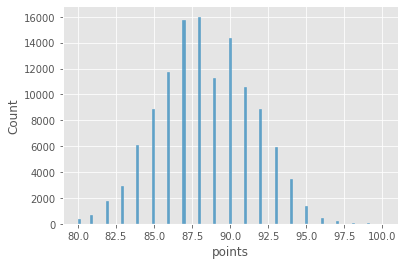

In [203]:
sns.histplot(df['points'])
plt.show()

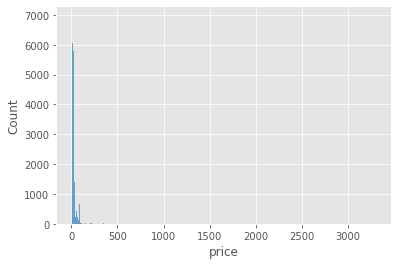

In [204]:
sns.histplot(df['price'])
plt.show()

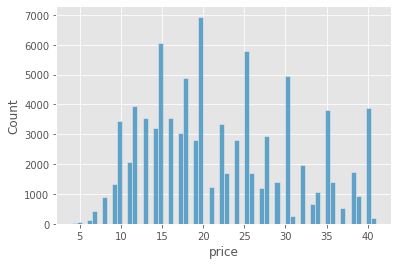

In [210]:
sns.histplot(df['price'][df['price'] < 42])
plt.show()

- 점수
  - 80~100점 사이 고르게 분포
- 가격
  - 최소 4달러, 최대 3300달러로 격차가 매우 크다
  - 대부분(75%)은 4~42달러에 분포

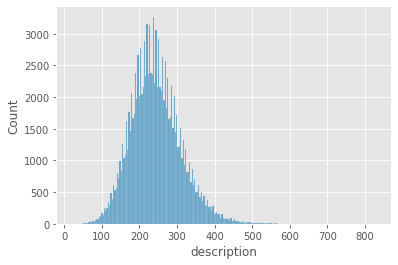

In [ ]:
#보통 어느정도 글자 수를 썼을까?
sns.histplot(df['description'].map(len))
plt.show()

In [ ]:
print(min(df['description'].map(len)), max(df['description'].map(len)))

20 829


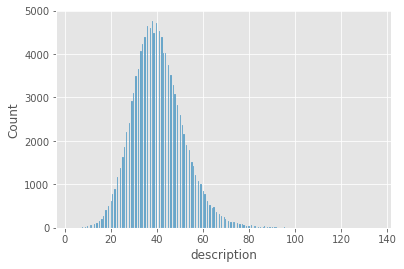

In [ ]:
sns.histplot(df['description'].map(lambda x: len(x.split())))
plt.show()

In [ ]:
print(min(df['description'].map(lambda x: len(x.split()))), max(df['description'].map(lambda x: len(x.split()))))

3 135


- 리뷰 글자 수
  - 대부분 100~400자 사이에 분포
  - 최소 20자 최대 829자
- 리뷰 단어 수
  - 대부분 20~80개 사이 분포
  - 최소 3개 최대 135개
  - 3단어 뭘까 궁금..

In [ ]:
# 리뷰 분석은 포도 종류별로 할 예정

df['variety'].value_counts()

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
                            ...  
Orangetraube                    1
Riesling-Chardonnay             1
Žilavka                         1
Pinotage-Merlot                 1
Bobal-Cabernet Sauvignon        1
Name: variety, Length: 691, dtype: int64

In [ ]:
df['variety'].value_counts().head(20)

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

총 691개의 분류</br>
너무 많아서 리뷰를 보고 싶은 품종만 선별</br>
총 11개
- Pinot Noir
- Chardonnay
- Cabernet Sauvignon
- Riesling
- Sauvignon Blanc
- Syrah / Shiraz
- Merlot
- Zinfandel
- Malbec
- Sangiovese
- Tempranillo

# 분석 시작

In [ ]:
df

country                                        description  points  \
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
5          Spain  Blackberry and raspberry aromas show a typical...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price        province  \
1        15.0           Douro   
2        14.0          Oregon   
3        13.0        Michigan   
4        65.0          Oregon   
5        15.0  Northern Spain   
...       ...             ...   
129966   28.0           Mosel   
129967   75.0          Oregon   
129968   30.0          Alsace   
129969   32.0          Alsace   
129970   21.0          Alsace   

                                                    title             variety  \
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

                                          winery  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                                   Sweet Cheeks  
5                                         Tandem  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[120915 rows x 8 columns]

## 리뷰 텍스트 전처리하기

In [ ]:
from tqdm import tqdm
import spacy
from collections import Counter

In [ ]:
#전체 문서 가공 시 warning 너무 많아서 살짝 무시해준다..
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# 필요한 리소스 로드. 작은 데이터로 진행
nlp = spacy.load('en_core_web_sm')

In [ ]:
%%time
# 전체 문서 가공 -> lemmatization한다. 문장부호, 공백 제거
tokens_normalized = []
for doc in tqdm(nlp.pipe(df['description'].str.lower())):
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    tokens_normalized.append(lemmas)

120915it [11:18, 178.34it/s]

CPU times: user 11min 4s, sys: 12.3 s, total: 11min 16s
Wall time: 11min 18s


## 문장 모델링(bigram, trigram)

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
%%time
# gensim을 이용해서 둘이, 셋이 잘 나오는 애들을 묶어준다
bigram_model = Phrases(tokens_normalized)
bigram_phraser = Phraser(bigram_model)

CPU times: user 16.8 s, sys: 89 ms, total: 16.9 s
Wall time: 16.9 s


In [ ]:
#trigram 만들기 위해 bigram 한번 더 진행
tokens_bigram = []
for s in tokens_normalized:
    bigram_phrases = bigram_phraser[s]
    tokens_bigram.append(bigram_phrases)

In [ ]:
trigram_model = Phrases(tokens_bigram)
trigram_phraser = Phraser(trigram_model)

In [ ]:
tokens_trigram = []
for s in tokens_bigram:
    trigram_phrases = trigram_phraser[s]
    trigram_phrases = [token for token in trigram_phrases if token not in nlp.Defaults.stop_words and token != '-PRON-']
    tokens_trigram.append(trigram_phrases)

In [ ]:
preprocessed_sentences = []
for s in tokens_trigram:
  preprocessed_sentences.append(' '.join(s))

In [ ]:
#전처리된 컬럼 확인
df['description preprocessed'] = preprocessed_sentences
df

country                                        description  points  \
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
5          Spain  Blackberry and raspberry aromas show a typical...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

        price        province  \
1        15.0           Douro   
2        14.0          Oregon   
3        13.0        Michigan   
4        65.0          Oregon   
5        15.0  Northern Spain   
...       ...             ...   
129966   28.0           Mosel   
129967   75.0          Oregon   
129968   30.0          Alsace   
129969   32.0          Alsace   
129970   21.0          Alsace   

                                                    title             variety  \
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
...                                                   ...                 ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...            Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)          Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...      Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)          Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...      Gewürztraminer   

                                          winery  \
1                            Quinta dos Avidagos   
2                                      Rainstorm   
3                                     St. Julian   
4                                   Sweet Cheeks   
5                                         Tandem   
...                                          ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967                                  Citation   
129968                           Domaine Gresser   
129969                      Domaine Marcel Deiss   
129970                          Domaine Schoffit   

                                 description preprocessed  
1       ripe fruity wine smooth structure firm tannin ...  
2       tart snappy flavor lime flesh rind dominate gr...  
3       pineapple rind lemon_pith orange_blossom start...  
4       like regular_bottling 2012 come_across_as roug...  
5       blackberry raspberry aromas typical navarran w...  
...                                                   ...  
129966  note honeysuckle cantaloupe sweeten deliciousl...  
129967  citation decade bottle_age prior release mean ...  
129968  drain gravel_soil wine crisp dry character rip...  
129969  dry style pinot_gris crisp acidity weight soli...  
129970  big rich off_dry power intense spiciness round...  

[120915 rows x 9 columns]

### 분석 대상 단어 선정하기

In [ ]:
len(Counter([token for s in tokens_trigram for token in s]))

34411

In [ ]:
Counter([token for s in tokens_trigram for token in s]).most_common(10)

[('wine', 74573),
 ('flavor', 66883),
 ('fruit', 57508),
 ('finish', 38826),
 ('palate', 35898),
 ('aroma', 32861),
 ('acidity', 31524),
 ('cherry', 31098),
 ('tannin', 28345),
 ('ripe', 24707)]

단어 개수는 총 34411개</br>
와인을 평가하는 단어는 어느정도 정해져 있다. -> 모든 단어를 가져올 필요는 없다고 판단</br>
상위 500개만 분석 대상 단어로 선정

In [ ]:
full_counter = Counter([token for s in tokens_trigram for token in s])
target_words = [key for key, value in full_counter.most_common(500)]

## TF-IDF 계산하기

분석 대상 단어에 대해 TF-IDF 점수를 계산한다

In [ ]:
# tf-idf를 구하기 위한 함수

def tf(word, document):
    # document는 counter로 들어온다. key가 word, value가 count
    # tf는 문서에서 단어의 출현 빈도를 문서의 길이로 나눈 값이다
    return document[word] / sum(document.values())

def idf(word, corpus):
    # 단어 t가 포함된 문서의 수
    num_containing = sum(1 for document in corpus if document[word] > 0)
    return len(corpus) / (1 + num_containing) # 혹시 0일 때 에러 방지를 위해 +1

In [ ]:
# 계산을 빠르게 하기 위해 분석 대상 단어에 대해 IDF 값을 미리 구해 놓는다
# 전체 문서 집합 만들기(idf는 전체 집합이 동일하다면 고정된 값)
# 문서 하나는 단어와 그 빈도의 counter로 표현된다
# 전체 문서 집합은 counter의 리스트이다
counters = []
for s in tokens_trigram:
    review_counter = Counter(s)
    counters.append(review_counter)

target_words_idf = {target_word: idf(target_word, counters) for target_word in target_words}

In [ ]:
def tfidf(word, document, corpus):
    """TF-IDF 점수를 구한다."""
    return tf(word, document) * target_words_idf[word]

# 특정 문서와 다른 문서들간의 차이
def tfidf_scores(document, others):
    scores = {}
    for word in target_words:
        if word not in document:
            score = 0
        else:
            score = tfidf(word, document, others)
        scores[word] = score
    return scores

In [ ]:
# 타겟 문서들과 비교 문서들의 단어 빈도를 비교해서 타겟 문서의 평균 TF-IDF를 구한다.
def average_tfidf(documents, other_documents):
    corpus = []
    for other_document in other_documents:
      corpus.append(Counter(other_document.split()))

    document_scores = []
    for document in documents:
        document_counter = Counter(document.split())
        document_scores.append(tfidf_scores(document_counter, corpus))

    average_scores = {}
    for document_score in document_scores:
        for token, score in document_score.items():
            average_scores[token] = average_scores.get(token, 0) + score

    average_scores = {token: score / len(documents) for token, score in average_scores.items()}
    return average_scores

## 워드 클라우드

In [ ]:
# 품종이 피노누아인 리뷰 분석
df_pinotnoir = df[df['variety'] == 'Pinot Noir']
df_pinotnoir

country                                        description  points  \
4             US  Much like the regular bottling from 2012, this...      87   
21            US  A sleek mix of tart berry, stem and herb, alon...      87   
25            US  Oak and earth intermingle around robust aromas...      87   
35            US  As with many of the Erath 2010 vineyard design...      86   
41            US  A stiff, tannic wine, this slowly opens and br...      86   
...          ...                                                ...     ...   
129920        US  Shows the clean, citrus acid juiciness and sil...      91   
129931    France  A powerful, chunky wine, packed with solid tan...      91   
129936    France  A blend from several premier cru vineyards in ...      91   
129960  Portugal  Fresh and fruity, this is full of red cherry f...      90   
129967        US  Citation is given as much as a decade of bottl...      90   

        price    province                                              title  \
4        65.0      Oregon  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
21       20.0      Oregon                   Acrobat 2013 Pinot Noir (Oregon)   
25       69.0  California  Castello di Amorosa 2011 King Ridge Vineyard P...   
35       50.0      Oregon         Erath 2010 Hyland Pinot Noir (McMinnville)   
41       22.0      Oregon  Hawkins Cellars 2009 Pinot Noir (Willamette Va...   
...       ...         ...                                                ...   
129920   48.0  California  Pali 2006 Fiddlestix Vineyard Pinot Noir (Sta....   
129931  107.0    Burgundy          Henri de Villamont 2005  Grands-Echezeaux   
129936   66.0    Burgundy   Bouchard Père & Fils 2005 Premier Cru  (Pommard)   
129960   48.0       Douro  Caves Transmontanas 2006 Vértice Pinot Noir (D...   
129967   75.0      Oregon                  Citation 2004 Pinot Noir (Oregon)   

           variety                winery  \
4       Pinot Noir          Sweet Cheeks   
21      Pinot Noir               Acrobat   
25      Pinot Noir   Castello di Amorosa   
35      Pinot Noir                 Erath   
41      Pinot Noir       Hawkins Cellars   
...            ...                   ...   
129920  Pinot Noir                  Pali   
129931  Pinot Noir    Henri de Villamont   
129936  Pinot Noir  Bouchard Père & Fils   
129960  Pinot Noir   Caves Transmontanas   
129967  Pinot Noir              Citation   

                                 description preprocessed  
4       like regular_bottling 2012 come_across_as roug...  
21      sleek mix tart berry stem herb hint oak chocol...  
25      oak earth intermingle robust aroma wet forest_...  
35      erath 2010 vineyard_designate strongly herbal ...  
41      stiff tannic wine slowly open bring brambly be...  
...                                                   ...  
129920  clean citrus acid juiciness silky texture appe...  
129931  powerful chunky wine pack solid tannin promise...  
129936  blend premier_cru_vineyard pommard wine exhibi...  
129960  fresh fruity red cherry flavor crisp acidity a...  
129967  citation decade bottle_age prior release mean ...  

[12785 rows x 9 columns]

In [ ]:
# 전체와 비교했을 때 피노 누아가 가지는 특징적인 단어들은?
scores_pinotnoir = average_tfidf(df_pinotnoir['description preprocessed'], df['description preprocessed'])
# 점수 sorting, 상위 20개 확인
scores_pinotnoir_sorted = sorted(scores_pinotnoir.items(), key=lambda x:x[1], reverse=True)
scores_pinotnoir_sorted[:20]

[('pinot', 0.42950198297843056),
 ('pinot_noir', 0.31728357808947305),
 ('pomegranate', 0.25013360102085624),
 ('cola', 0.2082473822677251),
 ('silky', 0.19644003885610348),
 ('sandalwood', 0.19327422441254577),
 ('mushroom', 0.1896079315348315),
 ('cranberry', 0.18610741897938413),
 ('tea', 0.18097376760409198),
 ('forest_floor', 0.14733773790265686),
 ('raspberry', 0.13948026898862495),
 ('strawberry', 0.13860549705769223),
 ('thin', 0.12736253228025612),
 ('pie', 0.12382100087401186),
 ('appellation', 0.12130098948702102),
 ('cherry', 0.10767022982333291),
 ("winery_'s", 0.10285958563840658),
 ('highlight', 0.10233556264204192),
 ('streak', 0.10190117965845795),
 ('earth', 0.10014201670269648)]

In [ ]:
from wordcloud import WordCloud

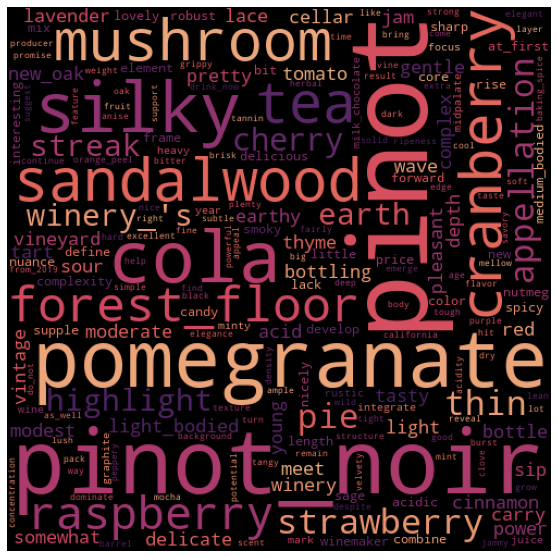

In [ ]:
wcred = WordCloud(max_font_size=100, width=500, height=500, colormap = 'flare')
pinotnoir_tfidf_wc = wcred.generate_from_frequencies(scores_pinotnoir)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(pinotnoir_tfidf_wc)
plt.show()

In [ ]:
# 품종이 샤도네이인 리뷰 분석
df_chardonnay = df[df['variety'] == 'Chardonnay']
df_chardonnay

country                                        description  \
14                US  Building on 150 years and six generations of w...   
55                US  This shows jelly-like flavors of orange and pe...   
56                US  This is weighty, creamy and medium to full in ...   
65            France  From the warm 2015 vintage, this is a soft and...   
66            France  This soft, rounded wine is ripe with generous ...   
...              ...                                                ...   
129908  South Africa  Pleasant scents of toasted apple and peach pit...   
129940            US  This is the winery's bells and whistles Chardo...   
129941            US  A Chardonnay with an unusual companion, 8% Sém...   
129949            US  There's no bones about the use of oak in this ...   
129955   New Zealand  Like Dog Point's 2011 Chardonnay, this wine is...   

        points  price      province  \
14          87   12.0    California   
55          85   30.0    California   
56          85   14.0    California   
65          86   24.0      Burgundy   
66          86   15.0      Burgundy   
...        ...    ...           ...   
129908      91   35.0  Stellenbosch   
129940      91   36.0    California   
129941      90   20.0    California   
129949      90   35.0    California   
129955      90   40.0   Marlborough   

                                                    title     variety  \
14               Mirassou 2012 Chardonnay (Central Coast)  Chardonnay   
55      RustRidge 2010 Estate Bottled Chardonnay (Napa...  Chardonnay   
56                Souverain 2010 Chardonnay (North Coast)  Chardonnay   
65                          Simonnet-Febvre 2015  Chablis  Chardonnay   
66      Vignerons des Terres Secrètes 2015  Mâcon-Mill...  Chardonnay   
...                                                   ...         ...   
129908  DeMorgenzon 2015 Reserve Chardonnay (Stellenbo...  Chardonnay   
129940  Standish 2006 Watson Vineyard Chardonnay (Mend...  Chardonnay   
129941         Apriori 2013 Chardonnay (Mendocino County)  Chardonnay   
129949  Flora Springs 2013 Barrel Fermented Chardonnay...  Chardonnay   
129955            Dog Point 2012 Chardonnay (Marlborough)  Chardonnay   

                               winery  \
14                           Mirassou   
55                          RustRidge   
56                          Souverain   
65                    Simonnet-Febvre   
66      Vignerons des Terres Secrètes   
...                               ...   
129908                    DeMorgenzon   
129940                       Standish   
129941                        Apriori   
129949                  Flora Springs   
129955                      Dog Point   

                                 description preprocessed  
14      build 150_year generation winemake_tradition w...  
55      jelly like flavor orange pear earthy tone mout...  
56      weighty creamy medium body plenty lime pear fl...  
65      warm 2015 vintage soft fruity wine open broad ...  
66      soft rounded wine ripe generous pear melon fla...  
...                                                   ...  
129908  pleasant scent toast apple peach_pit lead nose...  
129940  winery_'s bell whistles chardonnay grow inland...  
129941  chardonnay an_unusual companion 8_sémillon flo...  
129949  bone use oak wine spend_nine_month enjoy cradl...  
129955  like dog point 2011 chardonnay wine dominate_b...  

[11077 rows x 9 columns]

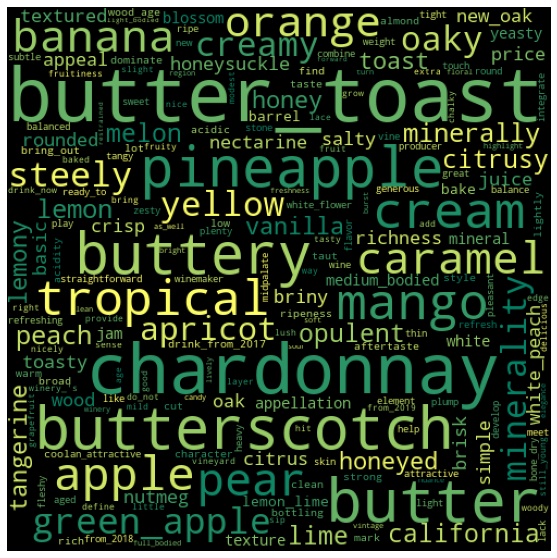

In [ ]:
# 전체와 비교했을 때 샤도네이가 가지는 특징적인 단어들은?
wcwhite = WordCloud(max_font_size=100, width=500, height=500, colormap = 'summer')

scores_chardonnay = average_tfidf(df_chardonnay['description preprocessed'], df['description preprocessed'])
chardonnay_tfidf_wc = wcwhite.generate_from_frequencies(scores_chardonnay)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(chardonnay_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_chardonnay_sorted = sorted(scores_chardonnay.items(), key=lambda x:x[1], reverse=True)
scores_chardonnay_sorted[:20]

[('butter_toast', 0.49335980368191523),
 ('chardonnay', 0.4004402033781089),
 ('butter', 0.3023950202427701),
 ('butterscotch', 0.2887749200729113),
 ('buttery', 0.26502191211659365),
 ('pineapple', 0.2582553092288177),
 ('cream', 0.2186546194757229),
 ('mango', 0.20829434458783067),
 ('tropical', 0.1990599387467665),
 ('apple', 0.17833348860499865),
 ('pear', 0.16907988572165564),
 ('banana', 0.16118436522587895),
 ('caramel', 0.15892182323737072),
 ('orange', 0.15266921052528554),
 ('green_apple', 0.1512815176034974),
 ('steely', 0.14629149508759154),
 ('creamy', 0.141179542235302),
 ('minerality', 0.13874239114027986),
 ('oaky', 0.1343986909849403),
 ('yellow', 0.1323243470127775)]

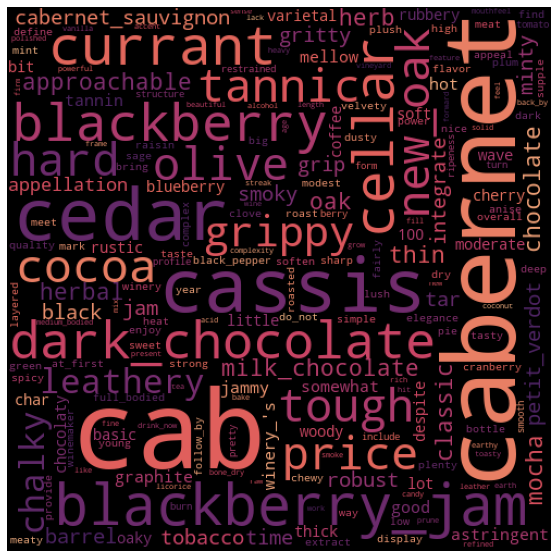

In [ ]:
# 품종이 까베르네 소비뇽인 리뷰 분석
df_cabernetsauvignon = df[df['variety'] == 'Cabernet Sauvignon']

scores_cabernetsauvignon = average_tfidf(df_cabernetsauvignon['description preprocessed'], df['description preprocessed'])
cabernetsauvignon_tfidf_wc = wcred.generate_from_frequencies(scores_cabernetsauvignon)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cabernetsauvignon_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_cabernetsauvignon_sorted = sorted(scores_cabernetsauvignon.items(), key=lambda x:x[1], reverse=True)
scores_cabernetsauvignon_sorted[:20]

[('cab', 0.5360848703686015),
 ('cabernet', 0.4521332093948996),
 ('cassis', 0.2130667844337315),
 ('cedar', 0.19834059027995526),
 ('blackberry_jam', 0.1637246664927492),
 ('cellar', 0.15896839876693838),
 ('currant', 0.1552065891156906),
 ('blackberry', 0.14428669734948463),
 ('dark_chocolate', 0.14248576054944698),
 ('cocoa', 0.11953941041156785),
 ('tough', 0.1158445333029109),
 ('new_oak', 0.11568129074047193),
 ('olive', 0.11527463962828756),
 ('tannic', 0.11272071872982098),
 ('hard', 0.11029304353565528),
 ('price', 0.10849385869174613),
 ('grippy', 0.10627396058806335),
 ('leathery', 0.10577161340235569),
 ('chalky', 0.10395447565712414),
 ('milk_chocolate', 0.10208340850112949)]

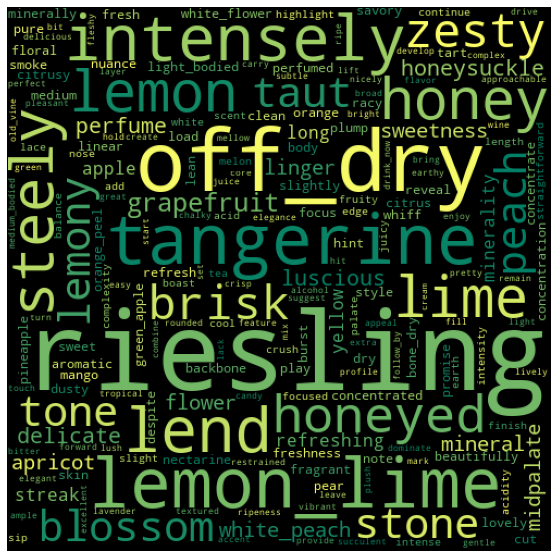

In [ ]:
#Riesling 분석
df_riesling = df[df['variety'] == 'Riesling']

scores_riesling = average_tfidf(df_riesling['description preprocessed'], df['description preprocessed'])
riesling_tfidf_wc = wcwhite.generate_from_frequencies(scores_riesling)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(riesling_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_riesling_sorted = sorted(scores_riesling.items(), key=lambda x:x[1], reverse=True)
scores_riesling_sorted[:20]

[('riesling', 1.0124558348593202),
 ('off_dry', 0.5534124269569498),
 ('lemon_lime', 0.34628310914377836),
 ('tangerine', 0.3452210020550999),
 ('intensely', 0.2918926382149453),
 ('lend', 0.2788597297095767),
 ('steely', 0.25325676158452626),
 ('lime', 0.23350075266513026),
 ('lemon', 0.2324642978390894),
 ('honey', 0.22862160357459088),
 ('honeyed', 0.22734741871101125),
 ('zesty', 0.2020587494418724),
 ('brisk', 0.18993976760652737),
 ('blossom', 0.18937333830021796),
 ('taut', 0.184723431875218),
 ('peach', 0.18240283031582186),
 ('lemony', 0.1801968128592139),
 ('tone', 0.17607503500027885),
 ('stone', 0.1717942869027297),
 ('grapefruit', 0.17108203623252044)]

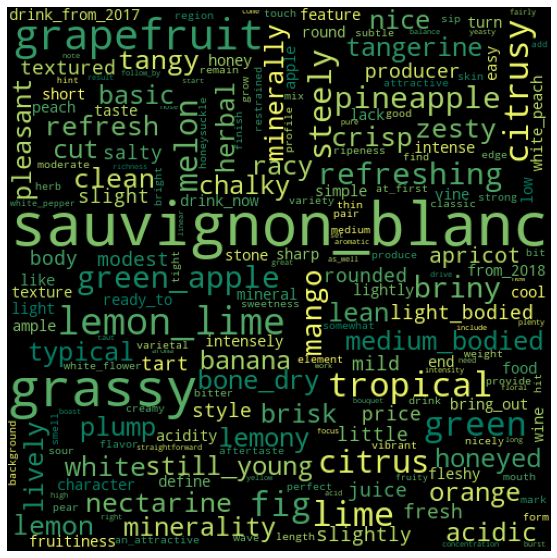

In [ ]:
# Sauvignon Blanc

df_sauvignonblanc = df[df['variety'] == 'Sauvignon Blanc']

scores_sauvignonblanc = average_tfidf(df_sauvignonblanc['description preprocessed'], df['description preprocessed'])
sauvignonblanc_tfidf_wc = wcwhite.generate_from_frequencies(scores_sauvignonblanc)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sauvignonblanc_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_sauvignonblanc_sorted = sorted(scores_sauvignonblanc.items(), key=lambda x:x[1], reverse=True)
scores_sauvignonblanc_sorted[:20]

[('sauvignon_blanc', 0.7919272912931977),
 ('grassy', 0.6114266069040126),
 ('grapefruit', 0.36054013964863474),
 ('lemon_lime', 0.2829070345213236),
 ('lime', 0.23224300508405152),
 ('fig', 0.21412728135466821),
 ('tropical', 0.212447143567568),
 ('green', 0.2087722083281),
 ('citrusy', 0.203092783903587),
 ('melon', 0.17951304648116648),
 ('citrus', 0.17599705439368435),
 ('steely', 0.17338365609333675),
 ('pineapple', 0.16324985737104927),
 ('green_apple', 0.16157291632317172),
 ('refreshing', 0.15844694734898745),
 ('briny', 0.1495853289918512),
 ('mango', 0.14185449686172036),
 ('lemon', 0.13542001157692715),
 ('tangy', 0.13280804264838234),
 ('nectarine', 0.12849394245557477)]

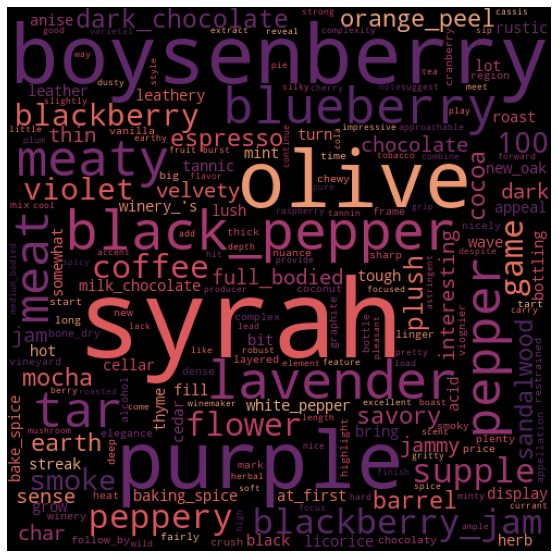

In [ ]:
# Syrah / Shiraz

df_syrah = df[df['variety'] == 'Syrah']
df_shiraz = df[df['variety'] == 'Shiraz']
df_syrah1 = df_syrah.append(df_shiraz)

scores_syrah = average_tfidf(df_syrah1['description preprocessed'], df['description preprocessed'])
syrah_tfidf_wc = wcred.generate_from_frequencies(scores_syrah)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(syrah_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_syrah_sorted = sorted(scores_syrah.items(), key=lambda x:x[1], reverse=True)
scores_syrah_sorted[:20]

[('syrah', 0.38522626735969745),
 ('boysenberry', 0.2129678613217891),
 ('purple', 0.20151702542745292),
 ('olive', 0.19329997859515566),
 ('black_pepper', 0.1907791356318745),
 ('lavender', 0.18687215018992942),
 ('meaty', 0.1699252080812609),
 ('blueberry', 0.165192716043221),
 ('tar', 0.16288861558164672),
 ('pepper', 0.15994417461813465),
 ('meat', 0.14800186184324732),
 ('blackberry_jam', 0.13265834798013015),
 ('supple', 0.12450313965865341),
 ('peppery', 0.12352168494709798),
 ('flower', 0.1161789668133005),
 ('coffee', 0.11566003477855667),
 ('game', 0.11412658043570764),
 ('blackberry', 0.1140236469424049),
 ('violet', 0.1134725815730049),
 ('smoke', 0.10816822383787514)]

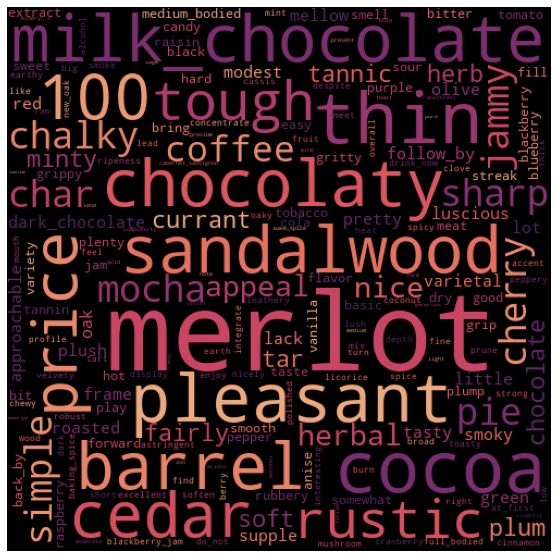

In [ ]:
# Merlot

df_merlot = df[df['variety'] == 'Merlot']

scores_merlot = average_tfidf(df_merlot['description preprocessed'], df['description preprocessed'])
merlot_tfidf_wc = wcred.generate_from_frequencies(scores_merlot)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(merlot_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_merlot_sorted = sorted(scores_merlot.items(), key=lambda x:x[1], reverse=True)
scores_merlot_sorted[:20]

[('merlot', 0.5244022568969704),
 ('thin', 0.16033377072405913),
 ('cocoa', 0.157997184953842),
 ('pleasant', 0.1392714919889619),
 ('milk_chocolate', 0.13328653273268565),
 ('chocolaty', 0.13197616975246637),
 ('barrel', 0.13131821249969464),
 ('sandalwood', 0.13086872843924444),
 ('100', 0.12782876924978007),
 ('cedar', 0.12154581978238946),
 ('price', 0.11631460269003623),
 ('tough', 0.11624798063052234),
 ('rustic', 0.11165669508566542),
 ('chalky', 0.10787793443169819),
 ('pie', 0.1077248904507658),
 ('sharp', 0.10618693017468193),
 ('cherry', 0.10583978670860616),
 ('mocha', 0.10315183617470751),
 ('char', 0.10063031804659478),
 ('jammy', 0.10032919744025981)]

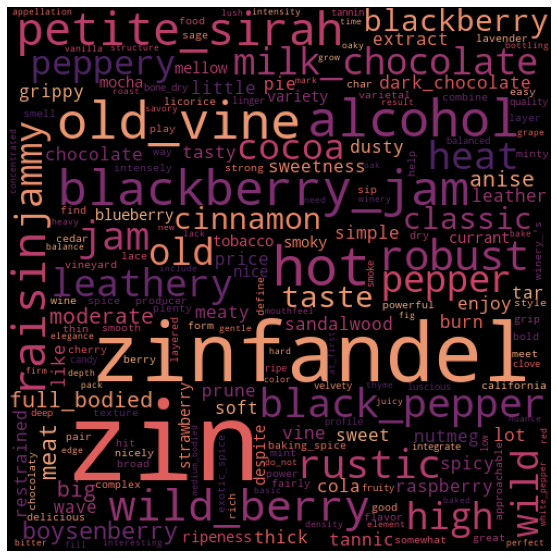

In [ ]:
# Zinfandel

df_zinfandel = df[df['variety'] == 'Zinfandel']

scores_zinfandel = average_tfidf(df_zinfandel['description preprocessed'], df['description preprocessed'])
zinfandel_tfidf_wc = wcred.generate_from_frequencies(scores_zinfandel)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(zinfandel_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_zinfandel_sorted = sorted(scores_zinfandel.items(), key=lambda x:x[1], reverse=True)
scores_zinfandel_sorted[:20]

[('zin', 2.1728591126639394),
 ('zinfandel', 1.0940112680039549),
 ('hot', 0.35108977689374965),
 ('old_vine', 0.3059412261420761),
 ('alcohol', 0.30116708190811353),
 ('blackberry_jam', 0.2780281232104467),
 ('raisin', 0.24693046278062689),
 ('petite_sirah', 0.2459202210888115),
 ('wild_berry', 0.2238830209584455),
 ('robust', 0.21735894351194562),
 ('black_pepper', 0.19582681270867555),
 ('jam', 0.19436986479280408),
 ('rustic', 0.19300180925366697),
 ('leathery', 0.1764758903888284),
 ('heat', 0.17568029323644566),
 ('milk_chocolate', 0.16834789136101586),
 ('high', 0.16462712570491628),
 ('wild', 0.16180507196047317),
 ('pepper', 0.15707350479381632),
 ('old', 0.1546915342329826)]

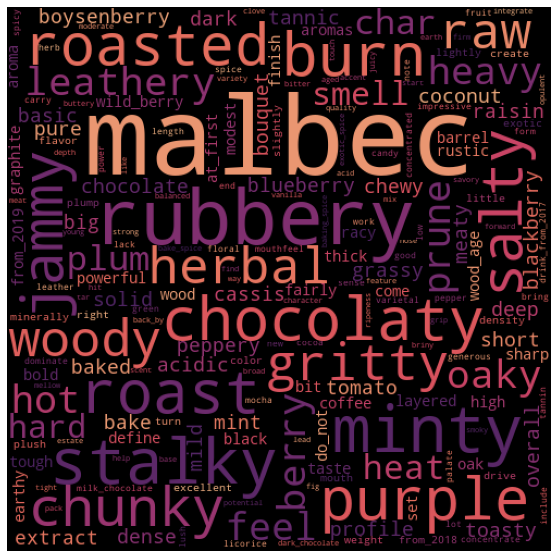

In [ ]:
# Malbec

df_malbec = df[df['variety'] == 'Malbec']

scores_malbec = average_tfidf(df_malbec['description preprocessed'], df['description preprocessed'])
malbec_tfidf_wc = wcred.generate_from_frequencies(scores_malbec)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(malbec_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_malbec_sorted = sorted(scores_malbec.items(), key=lambda x:x[1], reverse=True)
scores_malbec_sorted[:20]

[('malbec', 0.803592536451622),
 ('rubbery', 0.3204374258293858),
 ('minty', 0.21991376347138766),
 ('stalky', 0.2161141388505703),
 ('roast', 0.19218311035652583),
 ('burn', 0.19087989297241031),
 ('chocolaty', 0.19037106297741868),
 ('purple', 0.1866616044830157),
 ('roasted', 0.18278207019260478),
 ('jammy', 0.17753511674966246),
 ('salty', 0.1766377755236701),
 ('chunky', 0.17553854467804633),
 ('gritty', 0.1752699288383704),
 ('woody', 0.1731657231498696),
 ('herbal', 0.16781063391334142),
 ('raw', 0.16747213814244877),
 ('leathery', 0.1532924640392714),
 ('berry', 0.1525851843171786),
 ('oaky', 0.15093593952459175),
 ('heavy', 0.141920798614791)]

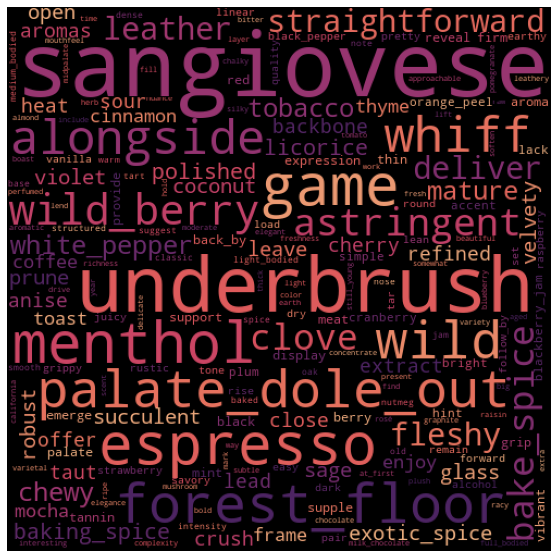

In [ ]:
# Sangiovese

df_sangiovese = df[df['variety'] == 'Sangiovese']

scores_sangiovese = average_tfidf(df_sangiovese['description preprocessed'], df['description preprocessed'])
sangiovese_tfidf_wc = wcred.generate_from_frequencies(scores_sangiovese)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(sangiovese_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_sangiovese_sorted = sorted(scores_sangiovese.items(), key=lambda x:x[1], reverse=True)
scores_sangiovese_sorted[:20]

[('sangiovese', 0.865788885075559),
 ('underbrush', 0.6148421701972057),
 ('game', 0.3214301763862241),
 ('menthol', 0.3169616565576912),
 ('espresso', 0.31212437441018004),
 ('forest_floor', 0.2797851616825215),
 ('palate_dole_out', 0.2518916746218379),
 ('wild', 0.24837173884868838),
 ('whiff', 0.21720332346397903),
 ('alongside', 0.21077887536145748),
 ('wild_berry', 0.2064526608180566),
 ('astringent', 0.20498385843163816),
 ('bake_spice', 0.18563083536885752),
 ('clove', 0.1819936857070071),
 ('straightforward', 0.17855224634186978),
 ('fleshy', 0.17836828088423365),
 ('leather', 0.17750291436112559),
 ('deliver', 0.17544439000735967),
 ('white_pepper', 0.17042442960854412),
 ('tobacco', 0.16892653207176264)]

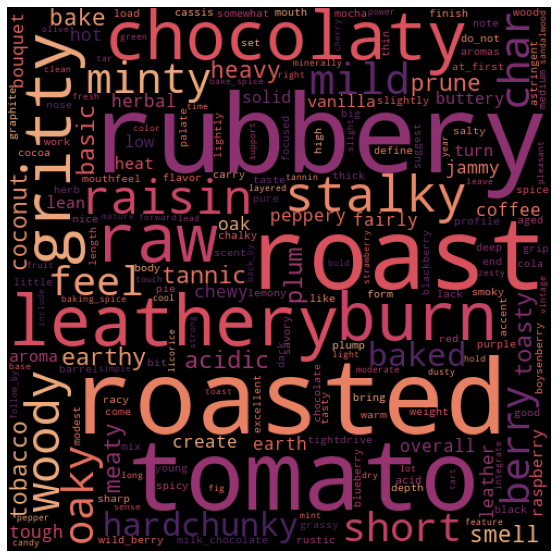

In [ ]:
# Tempranillo

df_tempranillo = df[df['variety'] == 'Tempranillo']

scores_tempranillo = average_tfidf(df_tempranillo['description preprocessed'], df['description preprocessed'])
tempranillo_tfidf_wc = wcred.generate_from_frequencies(scores_tempranillo)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(tempranillo_tfidf_wc)
plt.show()

In [ ]:
# 점수 상위 20개 확인
scores_tempranillo_sorted = sorted(scores_tempranillo.items(), key=lambda x:x[1], reverse=True)
scores_tempranillo_sorted[:20]

[('rubbery', 0.34041480646591454),
 ('roasted', 0.3063549662325814),
 ('roast', 0.28121319892274466),
 ('tomato', 0.27341038202510226),
 ('leathery', 0.27263803906552625),
 ('chocolaty', 0.2628094570296626),
 ('raw', 0.26049324981245336),
 ('burn', 0.25058988770804186),
 ('gritty', 0.24611871432352672),
 ('stalky', 0.24201535411052402),
 ('raisin', 0.21779506786511735),
 ('woody', 0.21616324416994467),
 ('minty', 0.2074553460014339),
 ('mild', 0.20240387180727643),
 ('oaky', 0.1995587135993361),
 ('char', 0.19588062007777257),
 ('short', 0.18074649964868475),
 ('feel', 0.17697441968503752),
 ('berry', 0.17643718360615968),
 ('chunky', 0.16816494823127254)]

## 토픽 모델링

In [ ]:
from gensim.corpora import Dictionary, MmCorpus

In [ ]:
# LDA 학습을 위해 사전 생성. 너무 많이/적게 나온 것들 적당히 필터링 후 콤팩트하게 정리
dictionary = Dictionary(tokens_trigram)
dictionary.filter_extremes(no_below=10, no_above=0.4)
dictionary.compactify()

In [ ]:
# LDA 학습용 코퍼스 구축
def make_bow_corpus(tokens):
    """
    generator function to read in reviews from the file
    and output a bag-of-words represention of the text
    """
    for review in tokens:
        yield dictionary.doc2bow(review)

corpus_filepath = 'corpus.mm'
MmCorpus.serialize(corpus_filepath, make_bow_corpus(tokens_trigram))
review_corpus = MmCorpus(corpus_filepath)

In [ ]:
from gensim.models import LdaMulticore

In [ ]:
%%time
lda = LdaMulticore(review_corpus,
                   num_topics=20,
                   id2word=dictionary,
                   workers=2,
                   random_state = 0)

CPU times: user 54.8 s, sys: 3.21 s, total: 58.1 s
Wall time: 1min 28s


In [ ]:
# 토픽 주제별로 어떤 단어가 들어갔는지 간단 확인
lda.show_topic(1)

[('sweet', 0.01748296),
 ('syrah', 0.014822281),
 ('ripe', 0.0131854545),
 ('blend', 0.013172884),
 ('cherry', 0.012451962),
 ('soft', 0.011053073),
 ('blackberry', 0.010438185),
 ('alcohol', 0.01031418),
 ('rich', 0.009421237),
 ('chocolate', 0.008872665)]

In [ ]:
# LDA 시각화
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 8.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4e5a272e7ddb2f152f0c06d1effe807795eec80c7e9f973ee9484862036714a3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
ldavis = pyLDAvis.gensim_models.prepare(topic_model=lda, 
                                        corpus=review_corpus, 
                                        dictionary=dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
pyLDAvis.display(ldavis)

- 차원1(PC1)
    - 왼쪽(5번)으로 갈수록 레드, 오른쪽(9번)으로 갈수록 화이트</br>
- 차원2(PC2)
    - 위(1번)로 갈수록 신맛, 아래(18번)로 갈수록 단맛

# 소비뇽블랑 분석

In [201]:
df_sauvignonblanc

country                                        description  \
34               US  This shows a tart, green gooseberry flavor tha...   
43               US  The clean, brisk mouthfeel gives this slightly...   
48               US  This bottling resembles the New Zealand paradi...   
64               US  There are intriguing touches to the nose of th...   
174     New Zealand  The Stoneleigh style traditionally favors ripe...   
...             ...                                                ...   
129806  New Zealand  VM's 2010 Cellar Selection SB is slightly weig...   
129827  New Zealand  Ostensibly a Central Otago producer, Rabbit Ra...   
129830        Chile  After several years spent in Chile's land of t...   
129904           US  A blend of Sauvignon Blanc, Sauvignon Gris and...   
129922      Austria  Herbs, spices and green fruit aromas show the ...   

        points  price       province  \
34          86   20.0     California   
43          86   14.0     California   
48          86   16.0       Virginia   
64          86   26.0     California   
174         88   19.0    Marlborough   
...        ...    ...            ...   
129806      89   20.0    Marlborough   
129827      86   22.0    Marlborough   
129830      86   10.0   Rapel Valley   
129904      91   33.0     California   
129922      91   48.0  Südsteiermark   

                                                    title          variety  \
34           Envolve 2011 Sauvignon Blanc (Sonoma Valley)  Sauvignon Blanc   
43         Robert Hall 2011 Sauvignon Blanc (Paso Robles)  Sauvignon Blanc   
48                Trump 2011 Sauvignon Blanc (Monticello)  Sauvignon Blanc   
64      Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...  Sauvignon Blanc   
174         Stoneleigh 2008 Sauvignon Blanc (Marlborough)  Sauvignon Blanc   
...                                                   ...              ...   
129806  Villa Maria 2010 Cellar Selection Sauvignon Bl...  Sauvignon Blanc   
129827    Rabbit Ranch 2007 Sauvignon Blanc (Marlborough)  Sauvignon Blanc   
129830  Santa Carolina 2008 Reserva Sauvignon Blanc (R...  Sauvignon Blanc   
129904  Chalk Hill 2015 Estate Bottled Sauvignon Blanc...  Sauvignon Blanc   
129922  Sattlerhof 2006 Kranachberg Sauvignon Blanc (S...  Sauvignon Blanc   

                winery                           description preprocessed  
34             Envolve  tart green gooseberry flavor similar new_zeala...  
43         Robert Hall  clean brisk mouthfeel slightly oake sauvignon_...  
48               Trump  bottling resemble new_zealand paradigm sauvign...  
64              Sevtap  intrigue touch nose bottling jasmine sea_salt ...  
174         Stoneleigh  stoneleigh style traditionally favor ripeness ...  
...                ...                                                ...  
129806     Villa Maria  vm_'s 2010 cellar selection sb slightly weight...  
129827    Rabbit Ranch  ostensibly central_otago producer rabbit ranch...  
129830  Santa Carolina  several_year spend chile_'s land lose santa_ca...  
129904      Chalk Hill  blend sauvignon_blanc sauvignon_gris sauvignon...  
129922      Sattlerhof  herb spice green fruit aroma freshness wine pa...  

[4780 rows x 9 columns]

In [202]:
df_sauvignonblanc.describe()

points        price
count  4780.000000  4780.000000
mean     87.406904    20.225523
std       2.680503     9.870419
min      80.000000     5.000000
25%      86.000000    14.000000
50%      87.000000    18.000000
75%      89.000000    24.000000
max      95.000000   135.000000

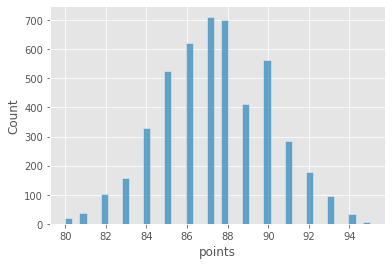

In [211]:
sns.histplot(df_sauvignonblanc['points'])
plt.show()

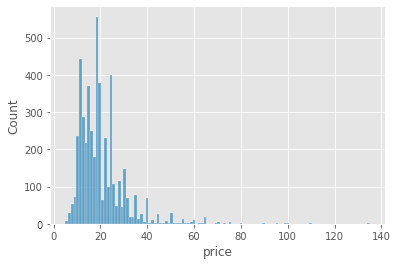

In [212]:
sns.histplot(df_sauvignonblanc['price'])
plt.show()

# 결론

그래서 나의 입맛에 맞는 와인 종류는?


내가 구매할 와인은 가볍고 과일 향이 나며, 너무 쓰거나 떫지 않고, 약간 단 맛이 있으면 좋겠다.

- body, tannin은 적고, fruity, sweet 와 같은 단어 중심의 리뷰가 달린 포도 품종 = **샤도네이, 리슬링, 소비뇽블랑**

포도 품종을 가장 잘 표현하는 단어 상위 20개를 추출한 결과,
화이트 와인 종류가 나의 입맛에 맞을 것이라 예상한다. 그 중에서도 **소비뇽블랑**은 내가 원하는 맛과 향을 표현하는 단어가 가장 많이 들어있다. (비슷한 의미나 중복 포함)


> grapefruit, lemon_lime, lime, tropical, citrusy, melon, citrus, pineapple, green_apple, mango, lemon

이번 주말에는 소비뇽 블랑을 사봐야겠다.